<p align="center">
  <img width="300" height="290" src="https://i.imgur.com/mu6ZuGT.jpg">
</p>

<h1><b>TC4033</b></h1>
<h1><b>Visión computacional para imágenes y video</b></h1>
<h3><b>9.2 Segmentación de imágenes</b></h3>
<h3><b>9.4 Algoritmo de segmentación de Otsu,</b></h3>
<h3><b>Docentes:</b> Dr. Gilberto Ochoa Ruiz, Mtra. María Guadalupe Marcos Abularach</h3>

<h2><b>Equipo 30:</b></h2>

- Julio Baltazar Colín: A01794476
- Helmy Andrea Moreno Navarro: A01793918
- Maricel Parra Osorio - A01793932
- Yeison Fernando Villamil Franco: A01793803


# 6. Otsu Thresholding

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)

Thresholding is used to create a binary image from a grayscale image

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np

In [2]:
import cv2 as cv2

In [3]:
from io import BytesIO
import requests

def imagen_desde_url(url):
  # Obtener la imagen desde la URL
  response = requests.get(url)
  img_data = BytesIO(response.content)

  # Decodificar los datos de la imagen y convertir a matriz de imagen
  image = cv2.imdecode(np.frombuffer(img_data.read(), np.uint8), 1)

  # Convertir la imagen de BGR a RGB (ya que OpenCV carga imágenes en formato BGR por defecto)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

  return image

## Single Thresholding <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

<ipython-input-4-ce81723eaa7b>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


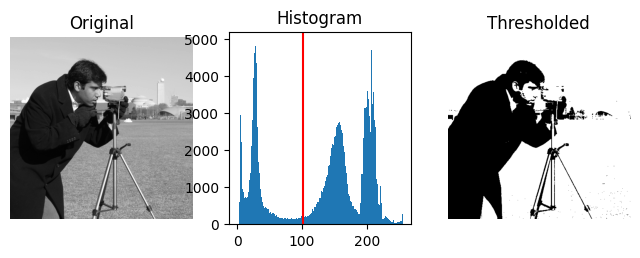

In [4]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




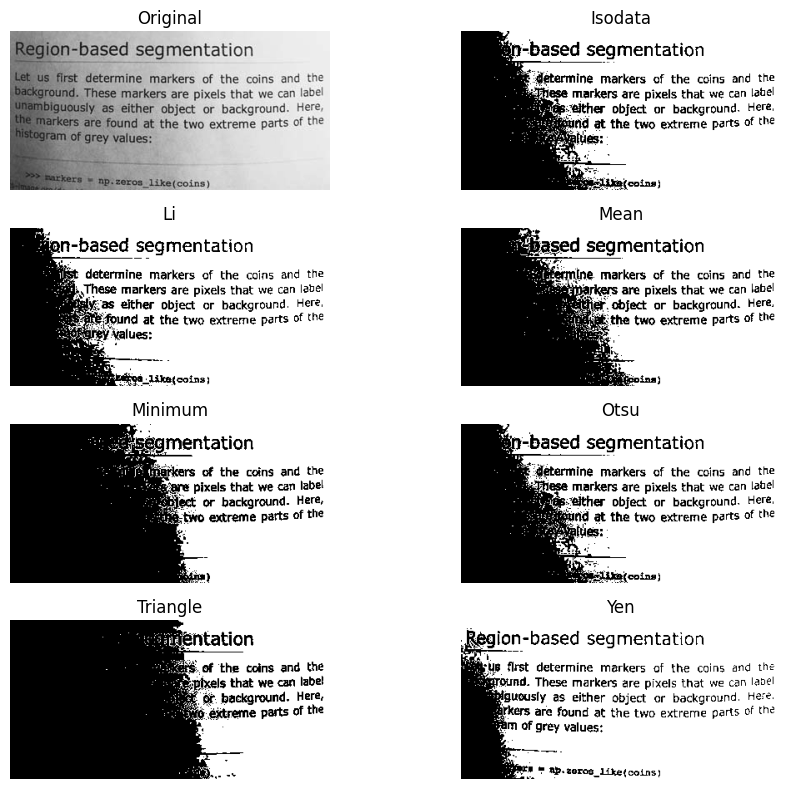

In [5]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [6]:
# TODO: Slide image for segmentation, alpha blerding

## Multi Thresholding <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

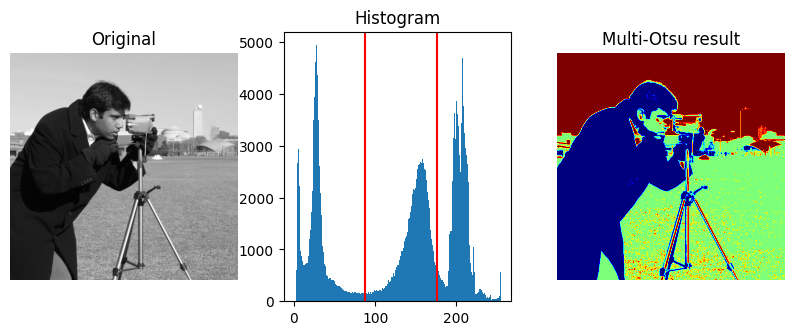

In [7]:
# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()


## **limitaciones de single thresholding contra el algoritmo de Otsu**



### 1. Experimenta con diferentes imagenes ademas de las provistas en en Colab, identifca imagenes con diferentes backgrounds y estilos, cuales son las limitaciones de single thresholding contra el algoritmo de Otsu

In [13]:
def otsu_vs_single(image_dict, xsz=15, ysz=7):

    # Crear una figura y un conjunto de subplots
    fig, axes = plt.subplots(len(image_dict), 6, figsize=(xsz, ysz))

    plt.subplots_adjust( wspace=0.01, hspace=0.3)

    # Para cada imagen del diccionario usando parejas
    for (title, image), ax in zip(image_dict.items(), axes):
        # Mostrar la imagen original
        ax[0].imshow(image, cmap='gray')
        ax[0].set_title('Original')
        ax[0].axis('off')

        # Convertir a escala de grises
        img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        ax[1].imshow(img_gray, cmap='gray')
        ax[1].set_title('Escala de grises')
        ax[1].axis('off')

        # Calcular el umbral de Otsu
        threshold = threshold_otsu(img_gray)
        img_binary = img_gray > threshold

        # Mostrar el histograma
        ax[2].hist(img_gray.ravel(), bins=256)
        ax[2].set_title('Histograma Grises')
        ax[2].axvline(threshold, color='r')

        # Hacer el plot con umbral simple
        ax[3].imshow(img_binary, cmap='gray')
        ax[3].set_title('Resultado Umbral Simple')
        ax[3].axis('off')

        #calcular los multithesholds
        thresholds = threshold_multiotsu(img_gray)

        #obtener las regiones
        regiones = np.digitize(img_gray, bins=thresholds)

        #mostrar el histograma
        ax[4].hist(image.ravel(), bins=255)
        ax[4].set_title('Histograma multirregion')
        for thresh in thresholds:
            ax[4].axvline(thresh, color='r')

        #mostra el resultado
        # Plotting the Multi Otsu result.
        ax[5].imshow(regiones, cmap='magma')
        ax[5].set_title('Resultado Multi-Otsu')
        ax[5].axis('off')

    plt.show()


In [9]:
image_1 = imagen_desde_url("https://github.com/yeivillamil/Team30_CV/blob/main/data/semana_9/artesania.jpg?raw=true")
image_2 = imagen_desde_url("https://github.com/yeivillamil/Team30_CV/blob/main/data/semana_2/alebrije.jpg?raw=true")
image_3 = imagen_desde_url("https://github.com/yeivillamil/Team30_CV/blob/main/data/semana_2/kitty-baseline.jpg?raw=true")
image_4 = imagen_desde_url("https://github.com/yeivillamil/Team30_CV/blob/main/data/semana_6/Cebra.jpg?raw=true")
image_5 = imagen_desde_url("https://github.com/yeivillamil/Team30_CV/blob/main/data/semana_4/00038_sat.jpg?raw=true")

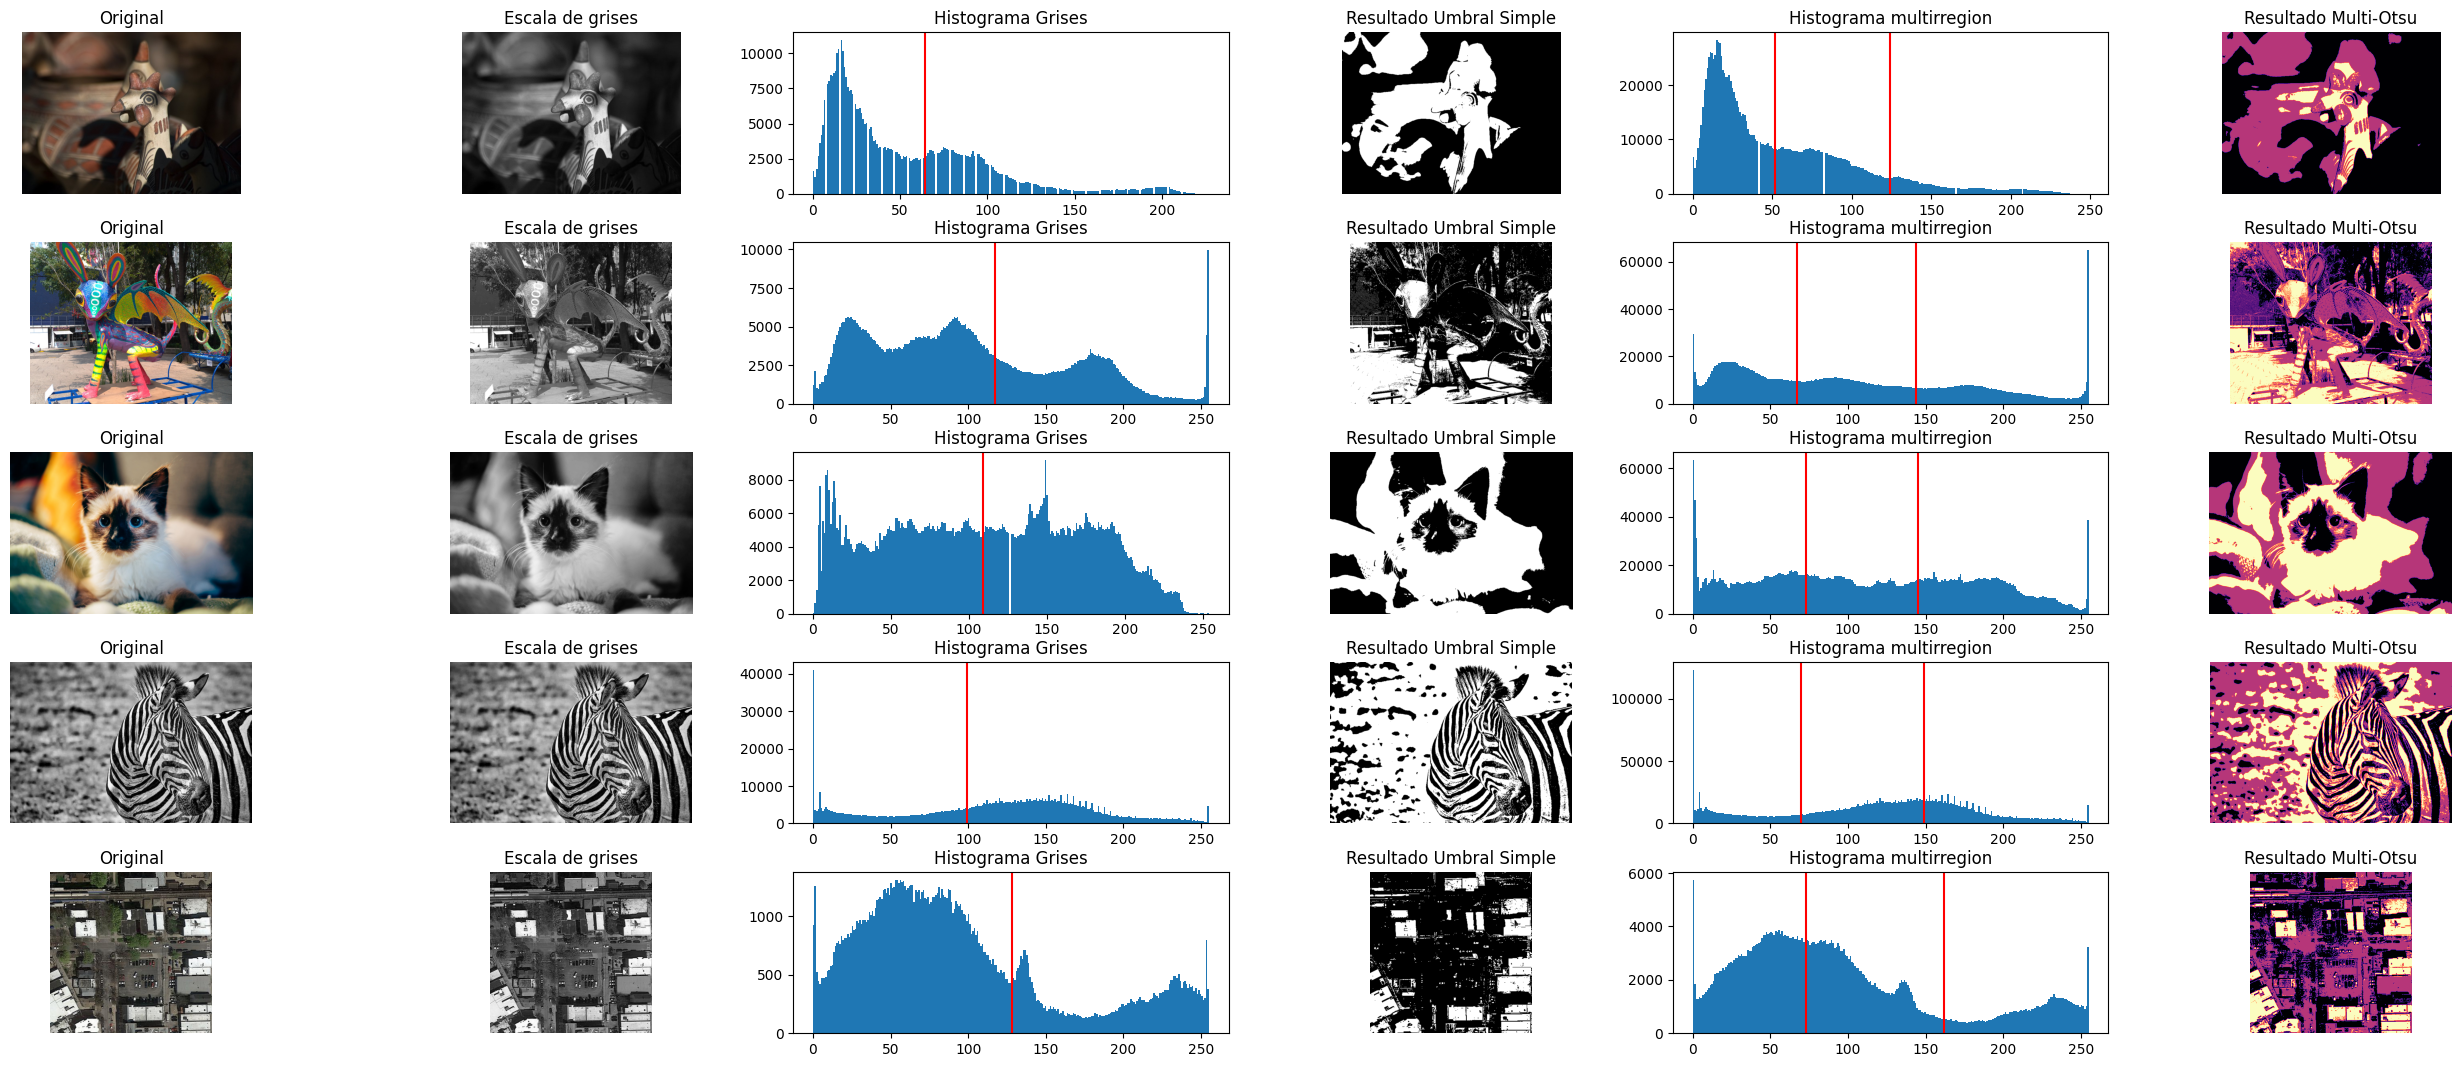

In [14]:
image_dict = { 'Artesania': image_1
              ,'Alebrije': image_2
              ,'Gatito': image_3
              ,'Zebra': image_4
              ,'Ortofoto': image_5
              }

otsu_vs_single(image_dict,34,13)

### **2. cuales son las limitaciones de single thresholding contra el algoritmo de Otsu**

El single thresholding, implica la selección de un umbral fijo para separar los píxeles de la imagen en dos clases, primer plano y fondo. Esta técnica tiene varias limitaciones entre ellas[1]:


* Sensibilidad a la iluminación y al ruido: El single thresholding puede ser sensible a variaciones en la iluminación de la imagen y al ruido. Un umbral fijo puede no ser efectivo para imágenes con iluminación variable o presencia de ruido. En el ejemplo anterior las imagenes del alebrije y la Ortofoto perdieron los detalles finos.

* Requiere analisis previo: La selección del umbral adecuado en el single thresholding requiere un conocimiento previo del contenido de la imagen y del rango de intensidades de los píxeles que varia en funcion del detalle y la iluminacion, como se ve en los histogramas, la mayoria de las veces el algolritmo opta por dividir a la mitad para separar el plano y el fondo lo cual no resulta siempre adecuado.

* No se adapta a la distribución de intensidades[1]: El single thresholding no tiene en cuenta la distribución de las intensidades de los píxeles en la imagen. Esto significa que puede no ser óptimo para imágenes con una distribución no uniforme de intensidades. En este ejemplo el resultado fue bueno para la zebra pero la artezania perdio todo el detalle.


En el caso del algoritmo de Otsu aborda alguna de estas limitaciones disminuye o elimina estas limitaciones determinar automáticamente el umbral óptimo para la segmentación de imágenes. Este algoritmo calcula el umbral que maximiza la varianza inter-clase o minimiza la varianza intra-clase de las intensidades de los píxeles en la imagen. Las limitaciones del single thresholding que el algoritmo de Otsu elimina incluyen[2]:


* Automatización: El algoritmo de Otsu no requiere la intervención manual para seleccionar el umbral. Esto lo hace más robusto y aplicable a una variedad más amplia de imágenes donde el pre-procesamiento de las imagenes es limitado o en tiempo real.

* Mayor Adaptabilidad: El algoritmo de Otsu es capaz de adaptarse a la distribución de intensidades de las imágenes, lo que lo hace más efectivo en una variedad de condiciones de iluminación y contenido de la imagen. En este ejemplo el resultado en todos los casos respeto el detalle y no se afecto tanto por la iluminación.

* Mejor segmentación: Al considerar la distribución de intensidades de los píxeles en la imagen, el algoritmo de Otsu tiende a producir segmentaciones más precisas y consistentes en comparación con el single thresholding.


**Referencias**:
[1]Articulo: Image Binarization using Otsu Thresholding Algorithm.
https://www.researchgate.net/publication/277076039_Image_Binarization_using_Otsu_Thresholding_Algorithm

[2]Articulo: K. Saddami, K. Munadi, Y. Away, y F. Arnia, «Improvement of binarization performance using local otsu thresholding», International Journal Of Electrical And Computer Engineering, vol. 9, n.o 1, p. 264, feb. 2019, doi: 10.11591/ijece.v9i1.pp264-272.
http://download.garuda.kemdikbud.go.id/article.php?article=1305193&val=146&title=Improvement%20of%20binarization%20performance%20using%20local%20otsu%20thresholding

